# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix

In [2]:
X_test = pd.read_csv('X_test.csv')
X_test = X_test.set_index([X_test.index, 'subject'])

X_train = pd.read_csv('X_train.csv')
X_train = X_train.set_index([X_train.index, 'subject'])

y_train = pd.read_csv("UCI_HAR_Dataset/train/y_train.txt", header=None, lineterminator='\n')
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', header=None, lineterminator='\n')

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [4]:
clf = DecisionTreeClassifier(max_depth=4, random_state=1729)
clf.fit(X_train, y_train)
importancia = clf.feature_importances_
indices = np.argsort(importancia)[::-1]
variaveis = X_train.columns

print("Melhores variáveis:")

for f in range(3):
    print("%d. variável %d (%f)" % (f + 1, indices[f], importancia[indices[f]]))
    print("Variável: ", variaveis[indices[f]])


Melhores variáveis:
1. variável 57 (0.280288)
Variável:  tGravityAcc-energy()-X
2. variável 272 (0.253431)
Variável:  fBodyAcc-mad()-X
3. variável 560 (0.172169)
Variável:  angle(Y,gravityMean)


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [5]:
%%time
melhores_variaveis = ['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']

path = clf.cost_complexity_pruning_path(X_valid[melhores_variaveis], y_valid)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2023, ccp_alpha=ccp_alpha)
    clf.fit(X_valid[melhores_variaveis], y_valid)
    clfs.append(clf)

best_alpha = ccp_alphas[np.argmin(impurities)]
print("Best ccp_alpha: ", best_alpha)


Best ccp_alpha:  0.0
CPU times: total: 109 ms
Wall time: 152 ms


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [6]:
clf_best = DecisionTreeClassifier(random_state=2023, ccp_alpha=best_alpha)
clf_best.fit(X_train[melhores_variaveis], y_train)
y_pred = clf_best.predict(X_test[melhores_variaveis])

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.50      0.47      0.48       496
           2       0.54      0.61      0.57       471
           3       0.68      0.63      0.65       420
           4       0.73      0.70      0.72       491
           5       0.74      0.76      0.75       532
           6       1.00      1.00      1.00       537

    accuracy                           0.70      2947
   macro avg       0.70      0.70      0.70      2947
weighted avg       0.70      0.70      0.70      2947



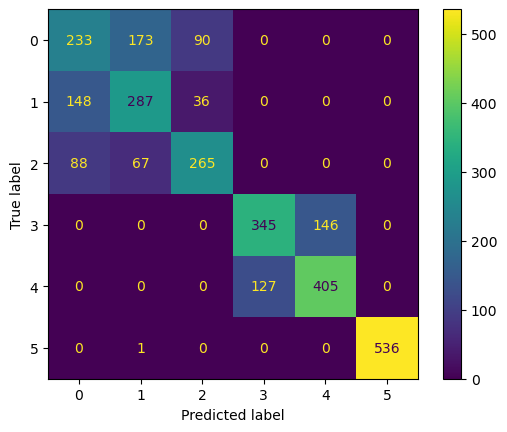

In [7]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()